# Homework Assignment 3 (Individual)

---

### <p style="text-align: right;"> &#9989; Lucas Reath.</p>


---
## Creating a natural selection model using ABMs and OOP

In this homework, we have two sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 31.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 0: Upload this file to your Git repository to track your progress on your assignment (15 pt)

#### Note: This is different from previous assignments!

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. We also want you to get practice with **branching**, as that will be important and useful for your group projects. 

**&#9989; Do the following**:


1. Navigate to your `cmse202-s23-turnin` repository 
2. Create a new branch called `hw03_branch` and move into it. 
3. Create a new directory called `hw-03`.
4. Move this notebook into that **new directory**, then **add** and **commit** it. 
5. Finally, to test that everything is working, `git push` the file and new branch so they end up in your GitHub repository. 

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory and `hw-03` branch that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



---

# A natural selection model
For this homework assignment, you will be building an Agent-Based Model (ABM) that simulates natural selection in action. You will build two classes for mice, which inhabit the world, and one class for a (predator) hawk. The mice have different fur color, which allows them to blend in better (or worse) with their environment. This model is (loosely) based on an actual case of natural selection involving the [Peppered Moth](https://en.wikipedia.org/wiki/Peppered_moth_evolution).

For this assignment, you will be working with an environment class, which will allow you to actually run your simulation. We've also provided you with a generic `Animal_Agent`, which you will use to build your own classes for the natural selection model. You will need to download the generic `Animal_Agent` class and `Environment` class. You can find them here:

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Animal_Agent_Class.py`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Environment.py`

## 1. Building Up an Environment with Animal Agents



### 1.1 (5 Points)

Spend some time exploring the new classes a bit. **Write a few sentences giving a high-level description of how this model works. What are the different classes? What do they do? How can they be used to create an Agent-Based Model?**


- Environment: Manages the simulation, including the agents' interactions and their environment.
- Animal_Agent: Represents a generic animal in the simulation, with common properties and behaviors.
- Mice and Hawk: Specific classes for mice and hawks, derived from Animal_Agent, with unique characteristics and behaviors.

To create the ABM:

- Set up the Environment with initial parameters.
- Create specific classes for mice and hawks.
- Add agents to the Environment.
- Run the simulation, observing natural selection in action as better-adapted agents survive and reproduce.

### 1.2 (15 Points)

Construct a new `Environment` object and a new `Animal_Agent` object. Specify that the `Animal_Agent` object is a female. Add the `Animal_Agent` object to the `Environment` object. Run the `simulation` method. You should see there's a bug in the code. **Fix the bug and explain what the cause was.**

TypeError: unsupported operand type(s) for -: 'list' and 'int'

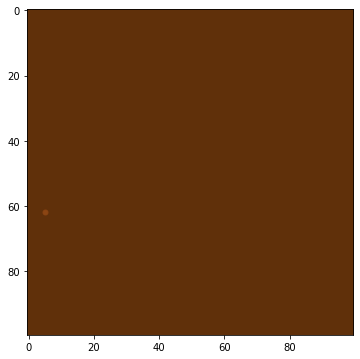

In [1]:
#Write your code here
from Environment import Environment
from Animal_Agent_Class import Animal_Agent

world = Environment()
animal = Animal_Agent(sex="F")
world.add_agent(animal)
world.simulate(10)

*The procreate function: procreate(self,all_agents,time) needs all the agents first and then the time. This is not the case and a change is needed from this:
temp_new_agents = agent.procreate(dt, self.animal_agents)
To this:
temp_new_agents = agent.procreate(self.animal_agents, dt)*

### 1.3 (5 Points)

**In the cell below, copy your `simulation` code from above and rerun it with the bug fixed to show how the animal runs around.** You should use the `set_allele()` method in the `Animal_Agent` class to randomly assign two alleles to your `Animal_Agent` object.


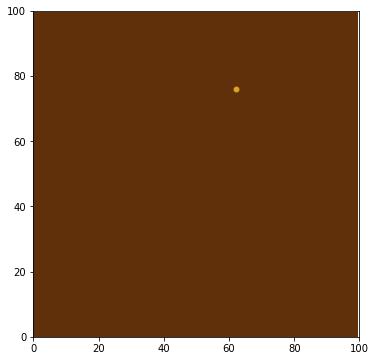

In [6]:
from Environment import Environment
from Animal_Agent_Class import Animal_Agent
import random

world = Environment()

animal = Animal_Agent(sex='F')

allele_1 = random.choice([0, 1])
allele_2 = random.choice([0, 1])
animal.set_allele(allele_1, allele_2)

world.add_agent(animal)
world.simulate(10)

### 1.4 (5 Points)

**Now add in a predator and let it evolve. Do you see the predator hunting the prey object?** Make sure to set the `ptype` to predator, and the `shape` and `color` to be something different from the prey you defined above (E.g., a shape of "P" and a color of "red".)

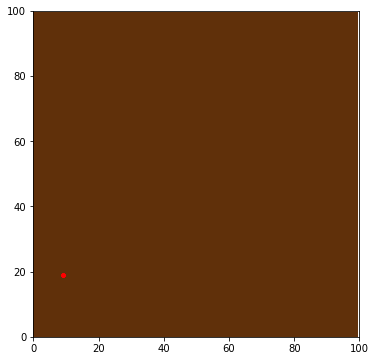

In [9]:
#Write your code here
from Environment import Environment
from Animal_Agent_Class import Animal_Agent
import random

world = Environment()

animal = Animal_Agent(sex='F')
allele_1 = random.choice([0, 1])
allele_2 = random.choice([0, 1])
animal.set_allele(allele_1, allele_2)

predator = Animal_Agent(sex='M', ptype='Predator', shape='P', color='red')

world.add_agent(animal)
world.add_agent(predator)

world.simulate(100)

### 1.5 (15 Points)

**Now add *multiple* predator and prey agents ($N > 1$ for both). Find a combination of $N_{\mathrm{Prey}}$ and $N_{\mathrm{Predator}}$ where the Prey can maintain a sustainable population (I.e., they aren't wiped out in the long run).**

- **NOTE 1:** Make sure you add both male and female Prey, so they can `Procreate`. 
- **NOTE 2:** We recommend using the `simulate_plot_populations()` method, so you can monitor the growth/decline of populations.

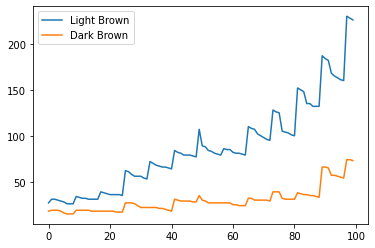

In [11]:
#Write your code here
from Environment import Environment
from Animal_Agent_Class import Animal_Agent
import random

world = Environment()

N_prey = 47
N_predator = 3 

for _ in range(N_prey):
    sex = random.choice(['M', 'F'])
    allele_1 = random.choice([0, 1])
    allele_2 = random.choice([0, 1])
    prey = Animal_Agent(sex=sex, ptype='Prey')
    prey.set_allele(allele_1, allele_2)
    world.add_agent(prey)

for _ in range(N_predator):
    sex = random.choice(['M', 'F'])
    predator = Animal_Agent(sex=sex, ptype='Predator', shape='P', color='red')
    world.add_agent(predator)

world.simulate_plot_populations(100)

### 1.6 (5 Points)

**How does the population evolve over time? (I.e., is it linear? Periodic? etc.) What causes this shape? How does the population of light brown and dark brown prey differ (if at all)?**

*The populations are not linear and appear periodic as there are consistent peaks and valleys. The light brown population (blue) appears significantly higher in population than the dark brown.*

## 2. Refining the Model

For this part, we're going to use our generic `Animal_Agent`class to construct child classes that represent *specific* animal species for both our predator and prey animals. Specifically, we'll be making a `Mouse` child class for the prey and a `Hawk` child class for the predator. **We'll use these new child classes to run our natural selection model.**

### 2.1 (15 Points)

Create a new `Mouse` child class, using the `Animal_Agent` as the parent class. The `Mouse` class will largely be the same as the `Animal_Agent` class except for two details: 

1. **In the `set_allele` method, add a new class attribute called `catch_probability`. For the light-brown mice, set `catch_probability` to 0.95. For dark brown mice, set the `catch_probability` to 0.05.**
2. **Change the `Procreate` method so that they create new `Mouse` animal objects.**



In [40]:
#Write your code here
from Animal_Agent_Class import Animal_Agent

class Mouse(Animal_Agent):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.ptype = 'Prey'

    def set_allele(self, allele1, allele2):
        self.allele = [allele1, allele2]  
        if self.allele == [0, 0]:
            self.catch_probability = 0.95
            self.color = 'goldenrod'  
        elif self.allele == [1, 1]:
            self.catch_probability = 0.05
            self.color = 'saddlebrown'  
        else:
            self.catch_probability = 0.5
            self.color = 'goldenrod'

    def procreate(self, all_agents, time):
        child_list = []
        if random.random() < 0.05:
            for _ in range(round(np.random.normal(2, 1))):
                child = Mouse(sex=random.choice(['M', 'F']), ptype='Prey')
                allele_d = self.allele[random.randint(0, 1)]
                allele_m = self.allele[random.randint(0, 1)]
                child.set_allele(allele_d, allele_m)
                child_list.append(child)
        return child_list


### 2.2 (10 Points)

Create a new `Hawk` child class, using the `Animal_Agent` as the parent class. The `Hawk` class will largely be the same as the `Animal_Agent` class except for one detail: **In the `hunt` method, incorporate the `catch_probability` of the predator, such that it is harder for a `Hawk` to catch a `Mouse` with a lower `catch_probability`.**

In [2]:
#Write your code here
from Animal_Agent_Class import Animal_Agent

class Hawk(Animal_Agent):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.ptype = 'Predator'
        self.shape = 'P'
        self.color = 'red'

    def hunt(self, all_agents):
        prey_list = [a for a in all_agents if a.ptype == 'Prey']
        if len(prey_list) == 0:
            return []
        else:
            num_prey_to_hunt = random.randint(1, 3)  # Define the number of prey to hunt at once
            prey_indices = []
            for _ in range(num_prey_to_hunt):
                prey = min(prey_list, key=lambda p: p.catch_probability)
                if random.random() < prey.catch_probability * 5:
                    prey_indices.append(all_agents.index(prey))
                    prey_list.remove(prey)
            return prey_indices


### 2.3 (5 Points)

**Repeat problem 1.5, replacing the generic prey with the `Mice` animals, and the generic predators with the `Hawk` animals.**

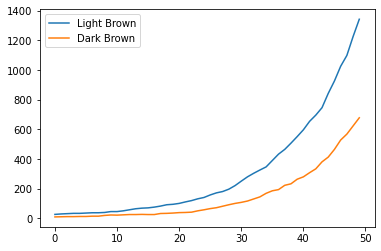

In [54]:
from Environment import Environment
import random
import numpy as np

world = Environment()

N_prey = 37
N_predator = 3

for _ in range(N_prey):
    sex = random.choice(['M', 'F'])
    allele_1 = random.choice([0, 1])
    allele_2 = random.choice([0, 1])
    prey = Mouse(sex=sex)
    prey.set_allele(allele_1, allele_2)
    world.add_agent(prey)

for _ in range(N_predator):
    sex = random.choice(['M', 'F'])
    predator = Hawk(sex=sex)
    world.add_agent(predator)

world.simulate_plot_populations(50)



### 2.4 (5 Points)

**Describe the differences between your results using the `Hawk` and `Mouse` class and the results from part 1.5. If and how does this model capture the effects of natural selection?**

*It was more challenging to use the Mouse and Hawk classes in this model, trying to adjust procreation rates and predator efficiency was tough. You can also see this plot is much more smooth and exponential. As before the light brown survived more effectively than the darker colored and ended the simulation with twice as large population.*

---
### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

## Git push, and then merge your `hw03_branch` into your `main` branch.